# 7章

## 7.2

In [1]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.2.5”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 3.2.5”

In [3]:
library(ggplot2)

In [4]:
d.room <- data_frame(
    kaiteki = c(6, 5, 6, 7, 2, 1, 1, 0, 7, 8, 8, 9, 8, 7, 6, 7), 
    size = c(rep("S", 8), rep("L", 8)), 
    student = c(rep(1, 4), rep(2, 4), rep(1, 4), rep(2, 4))
)
head(d.room)

kaiteki,size,student
6,S,1
5,S,1
6,S,1
7,S,1
2,S,2
1,S,2


In [164]:
write_csv(d.room, "../data/table7-1.csv")

In [5]:
str(d.room)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	16 obs. of  3 variables:
 $ kaiteki: num  6 5 6 7 2 1 1 0 7 8 ...
 $ size   : chr  "S" "S" "S" "S" ...
 $ student: num  1 1 1 1 2 2 2 2 1 1 ...


p.98

誤

```r
summary(aov(y ~ size + student + size:student))
```

正

```r
summary(aov(kaiteki ~ size + student + size:student))
```


In [8]:
d.room %>% aov(kaiteki ~ size + student + size:student, data = .) %>% summary()

             Df Sum Sq Mean Sq F value   Pr(>F)    
size          1     64   64.00      96 4.46e-07 ***
student       1     36   36.00      54 8.87e-06 ***
size:student  1     16   16.00      24 0.000367 ***
Residuals    12      8    0.67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [9]:
options(repr.plot.width = 3, repr.plot.height = 3)

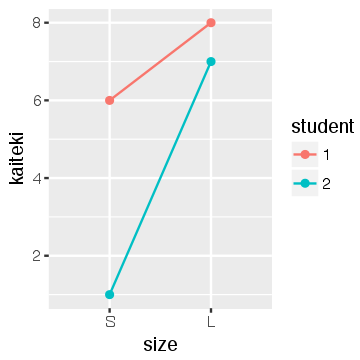

In [30]:
d.room %>% mutate(size=factor(size, levels=c("S", "L"), labels=c("S", "L")), 
                 student=factor(student)) %>% 
    group_by(size, student) %>% summarise(kaiteki = mean(kaiteki)) %>% 
    ggplot(aes(x = size, y = kaiteki, group=student, colour=student)) + geom_line() + geom_point()

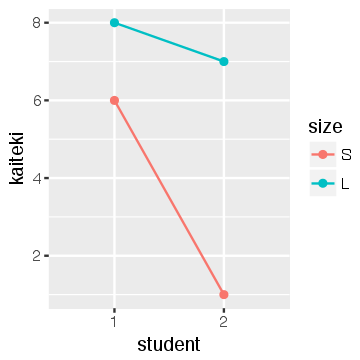

In [31]:
d.room %>% mutate(size=factor(size, levels=c("S", "L"), labels=c("S", "L")), 
                 student=factor(student)) %>% 
    group_by(student, size) %>% summarise(kaiteki = mean(kaiteki)) %>% 
    ggplot(aes(x = student, y = kaiteki, group=size, colour=size)) + geom_line() + geom_point()

In [32]:
library(readr)

Warning message:
“package ‘readr’ was built under R version 3.2.5”

In [50]:
d.soil <- read_csv("../samplecode/Rで学ぶ統計学入門図版作成用/table7-4.csv", col_names = FALSE)
str(d.soil)

Parsed with column specification:
cols(
  X1 = col_double()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	40 obs. of  1 variable:
 $ X1: num  36.1 34.1 32.7 29.2 26.5 32.8 36.2 29.2 30.8 36.1 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 1
  .. ..$ X1: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [52]:
d.soil %>% select(plant=X1) %>% mutate(soil = c(rep(1, 10), rep(2, 10), rep(1, 10), rep(2, 10)), 
                  ft = c(rep(1, 20), rep(2, 20)))  -> d.soil
d.soil

plant,soil,ft
36.1,1,1
34.1,1,1
32.7,1,1
29.2,1,1
26.5,1,1
32.8,1,1
36.2,1,1
29.2,1,1
30.8,1,1
36.1,1,1


In [163]:
write_csv(d.soil, "../data/table7-2.csv")

In [54]:
d.soil %>% aov(plant ~ soil + ft + soil:ft, data = .) %>% summary()

            Df Sum Sq Mean Sq F value   Pr(>F)    
soil         1   71.3    71.3   6.426 0.015733 *  
ft           1  404.5   404.5  36.462 6.18e-07 ***
soil:ft      1  160.8   160.8  14.495 0.000527 ***
Residuals   36  399.4    11.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

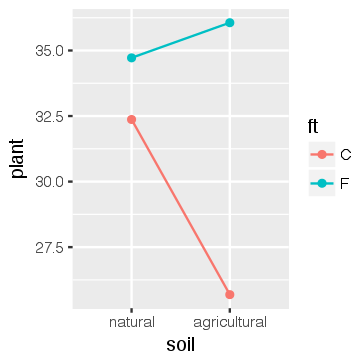

In [59]:
d.soil %>% mutate(soil = factor(soil, levels=c(1, 2), labels = c("natural", "agricultural")), ft = factor(ft, levels = c(1, 2), labels = c("C", "F"))) %>% 
    group_by(soil, ft) %>% summarise(plant=mean(plant)) %>% 
    ggplot(aes(x = soil, y = plant, group=ft, colour=ft)) + geom_line() + geom_point()

F値の計算

In [61]:
d.soil %>% group_by(soil, ft) %>% summarise(plant=mean(plant))

soil,ft,plant
1,1,32.37
1,2,34.72
2,1,25.69
2,2,36.06


In [62]:
d.soil %>% select(-ft) %>% group_by(soil) %>% summarise(plant=mean(plant))

soil,plant
1,33.545
2,30.875


In [63]:
d.soil %>% select(-soil) %>% group_by(ft) %>% summarise(plant=mean(plant))

ft,plant
1,29.03
2,35.39


In [67]:
d.soil %>% summarise(plant=mean(plant)) 

plant
32.21


In [97]:
d.soil %>% group_by(soil, ft) %>% summarise(x = mean(plant), n = n()) %>% 
    mutate(x = n * (x - 32.21)**2) %>% ungroup() %>% summarise(sum(x))

sum(x)
636.586


In [80]:
d.soil %>% group_by(soil) %>% summarise(x = mean(plant), n = n()) %>% mutate(x = n * (x - 32.21)**2) %>% summarise(sum(x))

sum(x)
71.289


In [81]:
d.soil %>% group_by(ft) %>% summarise(x = mean(plant), n = n()) %>% mutate(x = n * (x - 32.21)**2) %>% summarise(sum(x))

sum(x)
404.496


In [88]:
d.soil %>% group_by(soil, ft) %>% mutate(x = (plant - mean(plant))**2 ) %>% summarise(x = sum(x)) %>% ungroup() %>% summarise(x = sum(x))

x
399.37


In [110]:
calc_f_value <- function(df){
    cat("要因", "SS", "df", "MS", "F", "\n")
    n <- 10
    n.soil <- 2
    n.ft <- 2
    mean.soil.ft <- df %>% group_by(soil, ft) %>% summarise(plant=mean(plant)) %>% .[["plant"]]
    mean.soil <- df %>% select(-ft) %>% group_by(soil) %>% summarise(plant=mean(plant)) %>% .[["plant"]]
    mean.ft <- df %>% select(-soil) %>% group_by(ft) %>% summarise(plant=mean(plant)) %>% .[["plant"]]
    mean_ <- df %>% summarise(plant=mean(plant)) %>% .[["plant"]]
    
    Y.SS <- df %>% mutate(x = (plant - mean_)**2) %>% summarise(Y.SS = sum(x)) %>% .[["Y.SS"]]
    df.all <- n.soil * n.ft * n * 1

    among.SS <- df %>% group_by(soil, ft) %>% summarise(x = mean(plant), n = n()) %>% 
        mutate(x = n * (x - mean_)**2) %>% ungroup() %>% summarise(among.SS = sum(x)) %>% .[["among.SS"]]
    df.among <- n.soil * n.ft - 1
    among.MS <- among.SS / df.among
    cat("グループ間", among.SS, df.among, "\n")
    
    soil.SS <- df %>% group_by(soil) %>% summarise(x = mean(plant), n = n()) %>% 
        mutate(x = n * (x - mean_)**2) %>% summarise(soil.SS = sum(x)) %>% .[["soil.SS"]]
    df.soil <- n.soil - 1
    soil.MS <- soil.SS / df.soil
    
    ft.SS <- df %>% group_by(ft) %>% summarise(x = mean(plant), n = n()) %>% 
        mutate(x = n * (x - mean_)**2) %>% summarise(ft.SS = sum(x)) %>% .[["ft.SS"]]
    df.ft <- n.ft - 1
    ft.MS <- ft.SS / df.ft
    
    inter.SS <- among.SS - soil.SS - ft.SS
    df.inter <- (n.soil - 1) * (n.ft - 1)
    inter.MS <- inter.SS / df.inter
    
    within.SS <- df %>% group_by(soil, ft) %>% 
        mutate(x = (plant - mean(plant))**2 ) %>% summarise(x = sum(x)) %>% ungroup() %>% summarise(within.SS = sum(x)) %>% .[["within.SS"]]
    df.within <- n.soil * n.ft * (n - 1)
    within.MS <- within.SS / df.within
    
    F.soil <- soil.MS / within.MS
    cat("土壌効果", soil.SS, df.soil, soil.MS, F.soil, "\n")

    F.ft <- ft.MS / within.MS
    cat("施肥効果", ft.SS, df.ft, ft.MS, F.ft, "\n")

    F.inter <- inter.MS / within.MS
    cat("交互効果", inter.SS, df.inter, inter.MS, F.ft, "\n")
    
    cat("グループ内", within.SS, df.within, within.SS, "\n")
    
    cat("総合計", Y.SS, df.all, "\n")
}
calc_f_value(d.soil) 

要因 SS df MS F 
グループ間 636.586 3 
土壌効果 71.289 1 71.289 6.426131 
施肥効果 404.496 1 404.496 36.46207 
交互効果 160.801 1 160.801 36.46207 
グループ内 399.37 36 399.37 
総合計 1035.956 40 


## 7.4 線形混合モデル: 固定要因とランダム変量要因を取り込む

In [111]:
d.pig <- read_csv("../samplecode/Rで学ぶ統計学入門図版作成用/table7-5.csv")
str(d.pig)

Parsed with column specification:
cols(
  number = col_integer(),
  wt = col_integer(),
  treat = col_character(),
  block = col_integer()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	36 obs. of  4 variables:
 $ number: int  1 2 3 4 5 6 7 8 9 10 ...
 $ wt    : int  125 124 127 121 127 123 126 122 121 128 ...
 $ treat : chr  "f" "f" "f" "f" ...
 $ block : int  1 1 1 1 1 1 2 2 2 2 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ number: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ wt    : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ treat : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ block : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [162]:
write_csv(d.pig, "../data/table7-5.csv")

In [112]:
head(d.pig)

number,wt,treat,block
1,125,f,1
2,124,f,1
3,127,f,1
4,121,f,1
5,127,f,1
6,123,f,1


In [114]:
options(repr.plot.width=6)

In [116]:
summary(d.pig)

     number            wt           treat               block  
 Min.   : 1.00   Min.   :107.0   Length:36          Min.   :1  
 1st Qu.: 9.75   1st Qu.:112.0   Class :character   1st Qu.:1  
 Median :18.50   Median :118.0   Mode  :character   Median :2  
 Mean   :18.50   Mean   :118.3                      Mean   :2  
 3rd Qu.:27.25   3rd Qu.:125.2                      3rd Qu.:3  
 Max.   :36.00   Max.   :129.0                      Max.   :3  

In [117]:
d.pig %>% group_by(treat) %>% summarise(mean(wt))

treat,mean(wt)
c,111.5000
f,125.0556


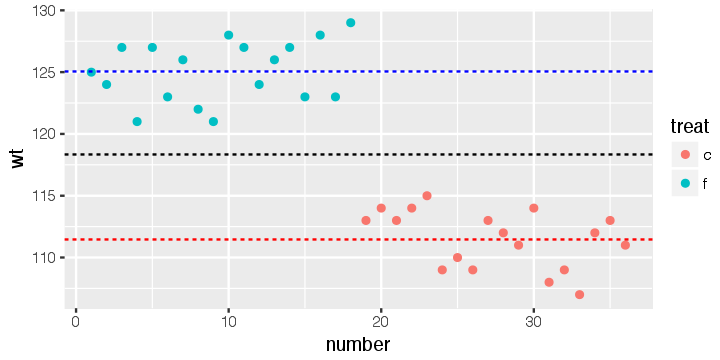

In [133]:
d.pig %>% ggplot(aes(x = number, y = wt, colour=treat)) + geom_point() + 
    geom_hline(yintercept = 111.5, linetype=2, colour=2) + 
    geom_hline(yintercept = 125.06, linetype=2, colour=4) + 
    geom_hline(yintercept = 118.3, linetype=2)

In [136]:
d.pig %>% mutate(block=factor(block), treat=factor(treat)) %>% aov(wt ~ treat + Error(block / treat), data=.) %>% summary()


Error: block
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  2  4.056   2.028               

Error: block:treat
          Df Sum Sq Mean Sq F value  Pr(>F)   
treat      1 1653.8  1653.8   106.5 0.00926 **
Residuals  2   31.1    15.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 30  166.3   5.544               

## 演習問題

In [139]:
d.mouse <- data_frame(
    wt = c(55.4, 49.7, 52.1, 49.5, 53.2, 51.4, 54.3, 
          47.2, 49.4, 51.3, 54.5, 48.1, 50.8, 52.7,
          50.5, 48.2, 48.4, 52.1, 51.8, 49.7, 49.2, 
          47.3, 46.2, 48.8, 50.1, 48.2, 47.0, 46.5), 
    feed = c(rep("A", 7*2), rep("B", 7*2)), 
    gender = c(rep("M", 7), rep("F", 7), rep("M", 7), rep("F", 7))
)
head(d.mouse)

wt,feed,gender
55.4,A,M
49.7,A,M
52.1,A,M
49.5,A,M
53.2,A,M
51.4,A,M


In [161]:
write_csv(d.mouse, "../data/table-ex7-2.csv")

In [141]:
options(repr.plot.width=3)

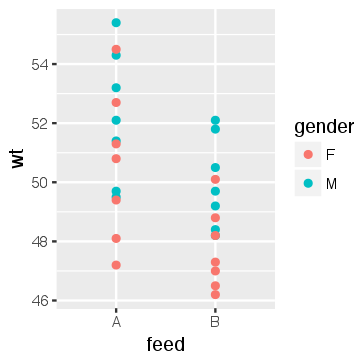

In [142]:
d.mouse %>% ggplot(aes(x = feed, y = wt, group=gender, colour=gender)) + geom_point()

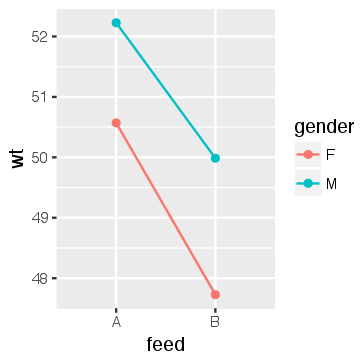

In [145]:
d.mouse %>% mutate(feed=factor(feed), gender=factor(gender)) %>% group_by(feed, gender) %>% summarise(wt=mean(wt)) %>% 
    ggplot(aes(x=feed, y=wt, group=gender, colour=gender)) + geom_line() + geom_point()

In [146]:
d.mouse %>% aov(wt ~ feed + gender + feed:gender, data=.)

Call:
   aov(formula = wt ~ feed + gender + feed:gender, data = .)

Terms:
                    feed   gender feed:gender Residuals
Sum of Squares  45.26286 26.81286     0.63000  95.21143
Deg. of Freedom        1        1           1        24

Residual standard error: 1.991769
Estimated effects may be unbalanced

In [147]:
d.mouse %>% aov(wt ~ feed + gender + feed:gender, data=.) %>% summary()

            Df Sum Sq Mean Sq F value  Pr(>F)   
feed         1  45.26   45.26  11.409 0.00249 **
gender       1  26.81   26.81   6.759 0.01571 * 
feed:gender  1   0.63    0.63   0.159 0.69378   
Residuals   24  95.21    3.97                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### 演習問題7.3

In [149]:
d.exam <- data_frame(
    indiv = c(1:36), 
    score = c(78, 72, 81, 71, 74, 72, 
              85, 83, 79, 77, 75, 77, 
              83, 86, 74, 76, 73, 71, 
              66, 71, 72, 60, 58, 55, 
              58, 49, 62, 69, 70, 63, 
              65, 59, 54, 67, 66, 67), 
    juku = c(rep(1, 18), rep(2, 18)), 
    class = rep(c(rep("A", 6), rep("B", 6), rep("C", 6)), 2)
)
head(d.exam)

indiv,score,juku,class
1,78,1,A
2,72,1,A
3,81,1,A
4,71,1,A
5,74,1,A
6,72,1,A


In [160]:
write_csv(d.exam, "../data/table-ex7-3.csv")

In [151]:
options(repr.plot.width = 6)

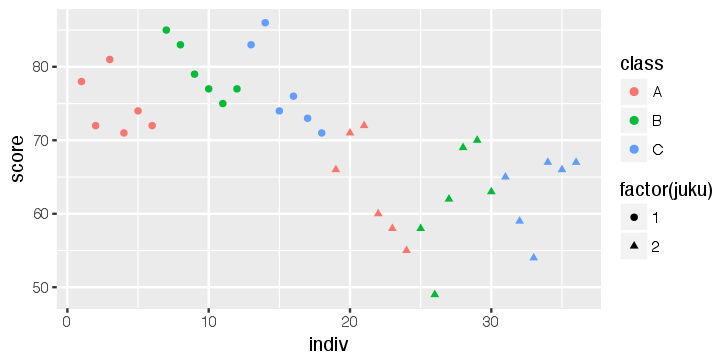

In [155]:
d.exam %>% ggplot(aes(x = indiv, y = score, shape=factor(juku), colour=class)) + geom_point()

In [157]:
d.exam %>% mutate(juku=factor(juku), class=factor(class)) %>% 
    aov(score ~ juku + Error(class / juku), data=.)


Call:
aov(formula = score ~ juku + Error(class/juku), data = .)

Grand Mean: 69.94444

Stratum 1: class

Terms:
                Residuals
Sum of Squares   12.38889
Deg. of Freedom         2

Residual standard error: 2.488864

Stratum 2: class:juku

Terms:
                     juku Residuals
Sum of Squares  1820.4444   63.3889
Deg. of Freedom         1         2

Residual standard error: 5.629782
Estimated effects are balanced

Stratum 3: Within

Terms:
                Residuals
Sum of Squares   1023.667
Deg. of Freedom        30

Residual standard error: 5.841423

In [158]:
d.exam %>% mutate(juku=factor(juku), class=factor(class)) %>% 
    aov(score ~ juku + Error(class / juku), data=.) %>% summary()


Error: class
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  2  12.39   6.194               

Error: class:juku
          Df Sum Sq Mean Sq F value Pr(>F)  
juku       1 1820.4  1820.4   57.44  0.017 *
Residuals  2   63.4    31.7                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 30   1024   34.12               

In [33]:
devtools::session_info()

Session info ------------------------------------------------------------------
Packages ----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, darwin13.4.0        
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 tz       Asia/Tokyo                  
 date     2017-05-28                  

 package    * version    date       source                            
 assertthat   0.1        2013-12-06 CRAN (R 3.2.0)                    
 base       * 3.2.3      2015-12-11 local                             
 Cairo        1.5-9      2015-09-26 CRAN (R 3.2.0)                    
 colorspace   1.2-7      2016-10-11 CRAN (R 3.2.5)                    
 crayon       1.3.2      2016-06-28 CRAN (R 3.2.5)                    
 datasets   * 3.2.3      2015-12-11 local                             
 DBI          0.5-1      2016-09-10 CRAN (R 3.2.5)                    
 devtools     1.13.1     2017-05-13 CRAN (R 3.2.5)                    
 digest       0.6.12     2017-01-27 CRAN (R 3.2.